In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from devkit.ml import NvidiaSmiLog
from time import sleep

In [3]:
nsl = NvidiaSmiLog()
nsl.start()
sleep(4)
nsl.stop()
nsl.df

<class 'bytes'> b'timestamp, name, pci.bus_id, temperature.gpu, utilization.gpu [%], utilization.memory [%]\r\n2024/01/10 21:37:36.138, NVIDIA GeForce GTX 1660 Ti, 00000000:01:00.0, 66, 6 %, 4 %\r\n2024/01/10 21:37:37.144, NVIDIA GeForce GTX 1660 Ti, 00000000:01:00.0, 66, 18 %, 8 %\r\n2024/01/10 21:37:38.151, NVIDIA GeForce GTX 1660 Ti, 00000000:01:00.0, 66, 19 %, 8 %\r\n2024/01/10 21:37:39.169, NVIDIA GeForce GTX 1660 Ti, 00000000:01:00.0, 66, 18 %, 8 %\r\n'


,timestamp,name,pci.bus_id,temperature.gpu,utilization.gpu [%],utilization.memory [%]
0,2024/01/10 21:37:36.138,NVIDIA GeForce GTX 1660 Ti,00000000:01:00.0,66,6 %,4 %
1,2024/01/10 21:37:37.144,NVIDIA GeForce GTX 1660 Ti,00000000:01:00.0,66,18 %,8 %
2,2024/01/10 21:37:38.151,NVIDIA GeForce GTX 1660 Ti,00000000:01:00.0,66,19 %,8 %
3,2024/01/10 21:37:39.169,NVIDIA GeForce GTX 1660 Ti,00000000:01:00.0,66,18 %,8 %


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
nsl.df.columns

Index(['timestamp', ' name', ' pci.bus_id', ' temperature.gpu',
       ' utilization.gpu [%]', ' utilization.memory [%]'],
      dtype='object')

In [36]:
import pandas as pd
dfm = pd.melt(nsl.df,id_vars=['timestamp','name'],value_vars=['utilization.gpu','utilization.memory'])
dfm

,timestamp,name,variable,value
0,2024-01-10 21:37:36.138,NVIDIA GeForce GTX 1660 Ti,utilization.gpu,6.0
1,2024-01-10 21:37:37.144,NVIDIA GeForce GTX 1660 Ti,utilization.gpu,18.0
2,2024-01-10 21:37:38.151,NVIDIA GeForce GTX 1660 Ti,utilization.gpu,19.0
3,2024-01-10 21:37:39.169,NVIDIA GeForce GTX 1660 Ti,utilization.gpu,18.0
4,2024-01-10 21:37:36.138,NVIDIA GeForce GTX 1660 Ti,utilization.memory,4.0
5,2024-01-10 21:37:37.144,NVIDIA GeForce GTX 1660 Ti,utilization.memory,8.0
6,2024-01-10 21:37:38.151,NVIDIA GeForce GTX 1660 Ti,utilization.memory,8.0
7,2024-01-10 21:37:39.169,NVIDIA GeForce GTX 1660 Ti,utilization.memory,8.0


Text(0, 0.5, 'Utilization %')

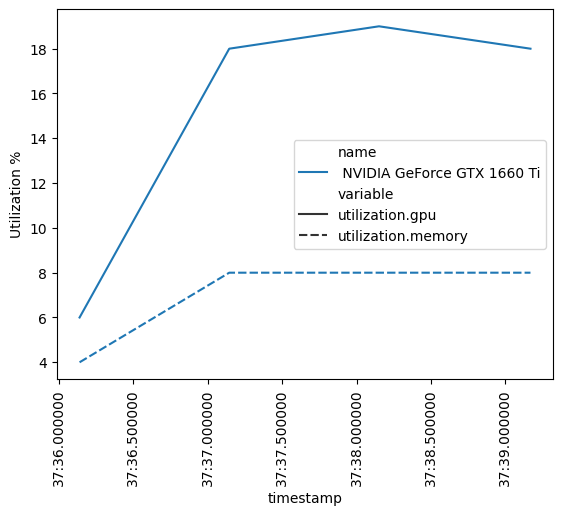

In [38]:
sns.lineplot(x="timestamp", y="value",style='variable',hue="name",data=dfm)
plt.xticks(rotation=90)
plt.ylabel('Utilization %')

In [ ]:
sns.lineplot(data=nsl.df,x='',y='', color="g")
ax2 = plt.twinx()
sns.lineplot(data=nsl.df, color="b", ax=ax2)
plt.show()